In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.dates as mdates

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the CSV file into a DataFrame
file_path = "/content/drive/MyDrive/Wind_data/merged_wind_data.csv"
merged_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify that it's loaded correctly
print(merged_df.head())


               time        local_time  electricity  wind_speed
0  01-01-2015 00:00  01-01-2015 01:00       50.031       4.306
1  01-01-2015 01:00  01-01-2015 02:00       82.902       4.988
2  01-01-2015 02:00  01-01-2015 03:00      121.623       5.620
3  01-01-2015 03:00  01-01-2015 04:00      128.826       5.724
4  01-01-2015 04:00  01-01-2015 05:00      118.837       5.569


In [ ]:
# Assuming 'merged_df' is your DataFrame

# Separate features (X) and target variable (y)
X = merged_df[['wind_speed']]  # Selecting 'wind_speed' as a feature
y = merged_df['electricity']   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# You can also print other metrics or visualize the results as needed


Mean Squared Error: 1034.0605455529972


In [ ]:
X_train.shape,X_test.shape

((35059, 1), (8765, 1))

In [ ]:
y_train.shape

(35059,)

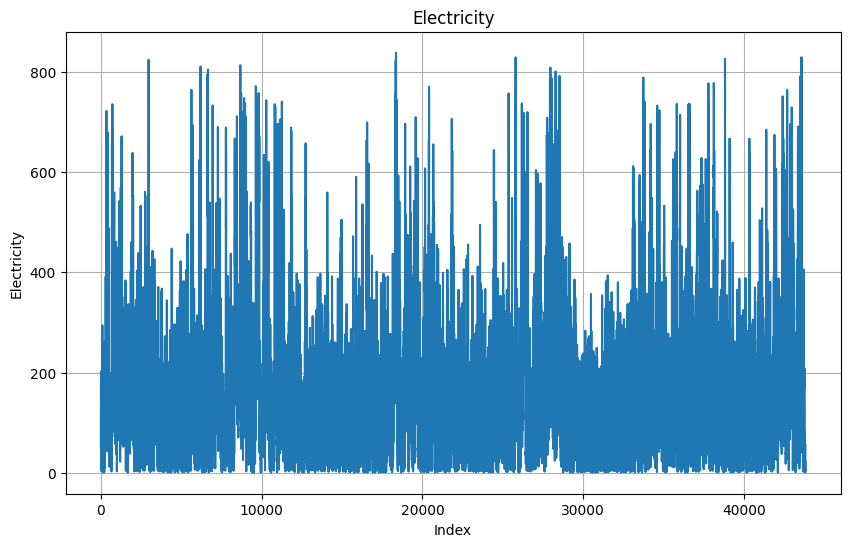

In [ ]:
# Plot electricity
plt.figure(figsize=(10, 6))
plt.plot(merged_df['electricity'])
plt.title('Electricity')
plt.xlabel('Index')
plt.ylabel('Electricity')
plt.grid(True)
plt.show()

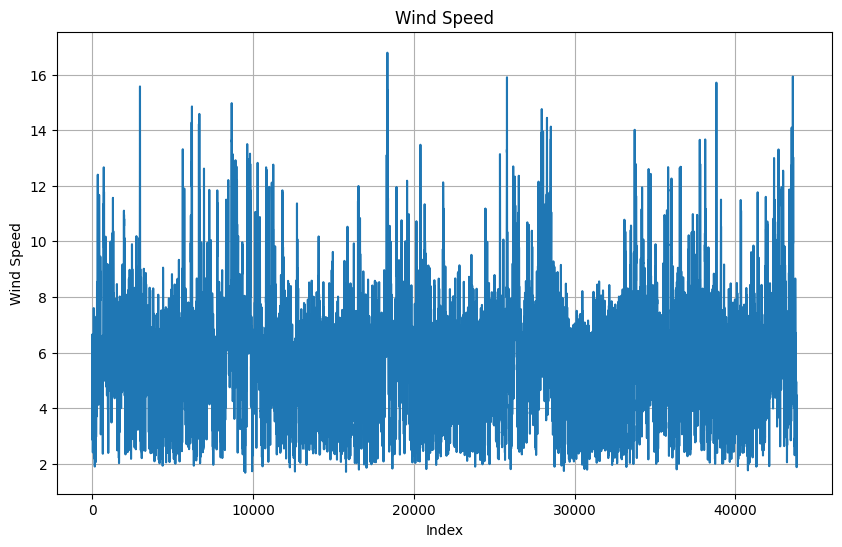

In [ ]:
# Plot wind_speed
plt.figure(figsize=(10, 6))
plt.plot(merged_df['wind_speed'])
plt.title('Wind Speed')
plt.xlabel('Index')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

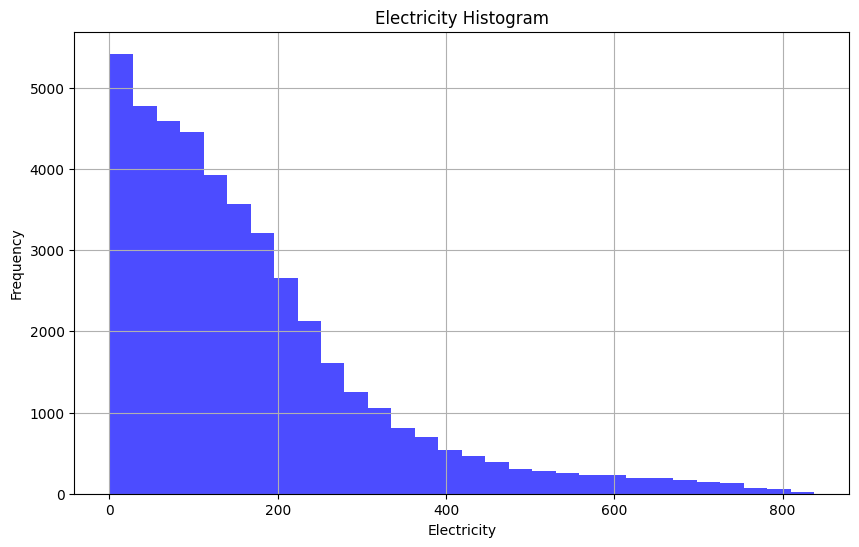

In [ ]:
# Plot histogram for electricity
plt.figure(figsize=(10, 6))
plt.hist(merged_df['electricity'], bins=30, color='blue', alpha=0.7)
plt.title('Electricity Histogram')
plt.xlabel('Electricity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


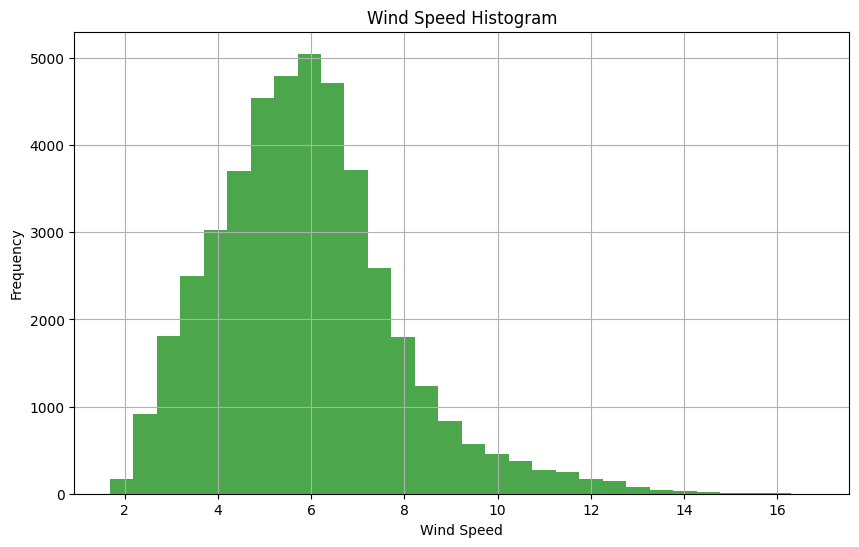

In [ ]:

# Plot histogram for wind_speed
plt.figure(figsize=(10, 6))
plt.hist(merged_df['wind_speed'], bins=30, color='green', alpha=0.7)
plt.title('Wind Speed Histogram')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

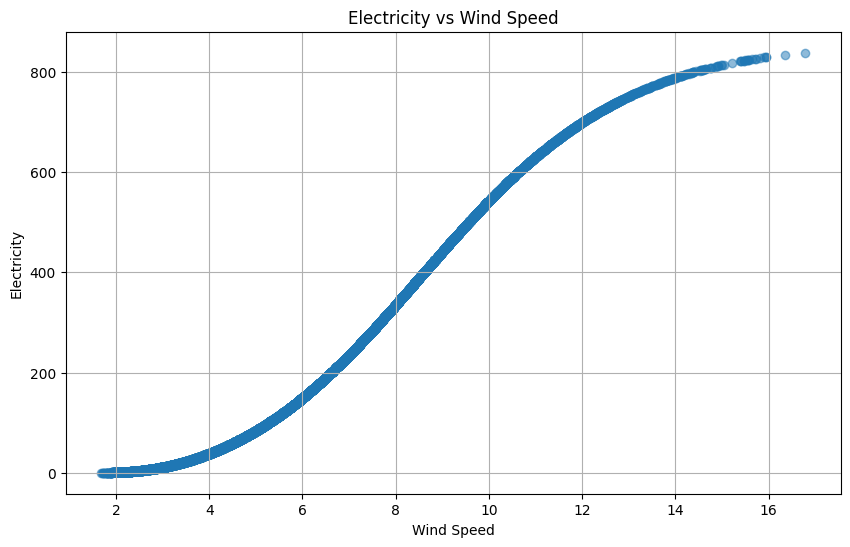

In [ ]:
# Plot electricity against wind_speed
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['wind_speed'], merged_df['electricity'], alpha=0.5)
plt.title('Electricity vs Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Electricity')
plt.grid(True)
plt.show()

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_scaled = model.predict(X_test_scaled)

# Evaluate the model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print("Mean Squared Error (Scaled):", mse_scaled)

# You can also print other metrics or visualize the results as needed


Mean Squared Error (Scaled): 1034.0605455529972


Mean Squared Error (MSE): 1039.4988740353313
Root Mean Squared Error (RMSE): 32.24126042876319


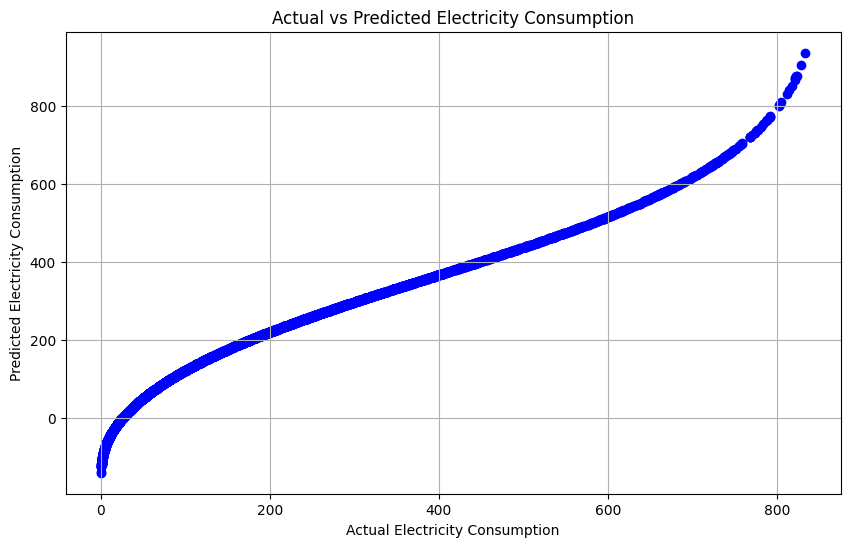

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for features
scaler_features_test = StandardScaler()

# Transform the testing features
X_test_scaled = scaler_features_test.fit_transform(X_test)

# Initialize StandardScaler for target variables
scaler_target_test = StandardScaler()

# Reshape y_test to a 2D array as StandardScaler expects 2D input
y_test_reshaped = y_test.values.reshape(-1, 1)

# Fit and transform the testing target variable
y_test_scaled = scaler_target_test.fit_transform(y_test_reshaped).flatten()

# Predict on the scaled testing data
y_pred_scaled = model.predict(X_test_scaled)

# Denormalize the predicted values for y_test
y_pred_denormalized = scaler_target.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Denormalize the testing target variable y_test
y_test_denormalized = scaler_target_test.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_denormalized, y_pred_denormalized, color='blue')
plt.title('Actual vs Predicted Electricity Consumption')
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.grid(True)
plt.show()


Mean Squared Error (MSE): 0.007659496254453269
R-squared Score (R2): 0.9999996584303191


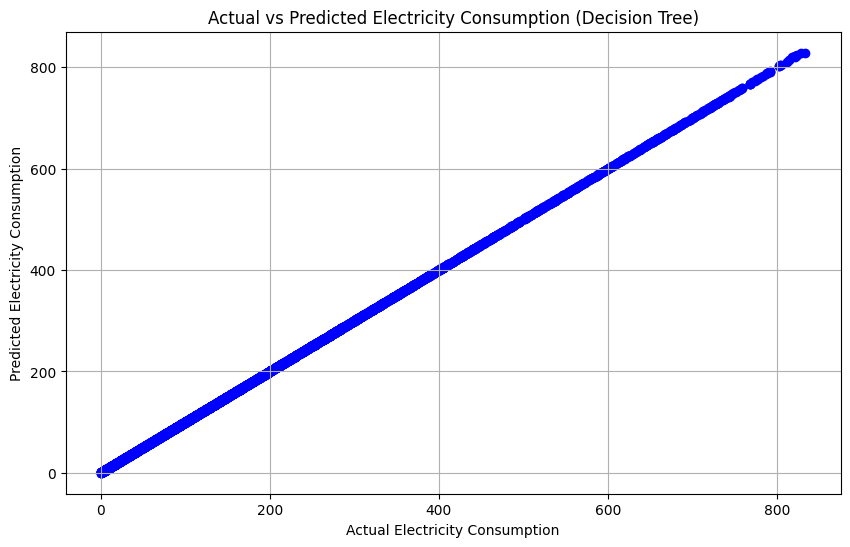

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize the decision tree regressor
tree_model = DecisionTreeRegressor()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score (R2):", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Electricity Consumption (Decision Tree)')
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.grid(True)
plt.show()


Mean Squared Error (MSE): 0.004949191416758862
R-squared Score (R2): 0.9999997792943979


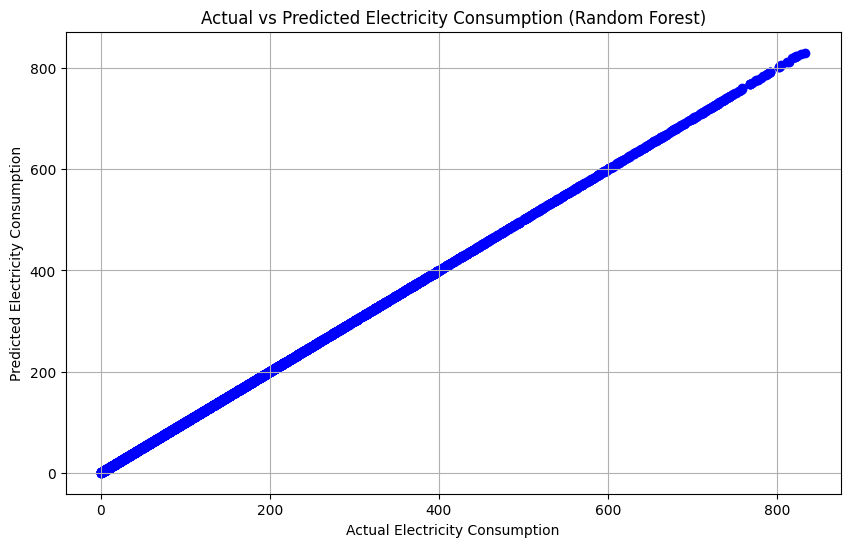

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score (R2):", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Electricity Consumption (Random Forest)')
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.grid(True)
plt.show()

In [ ]:
import random

# Generate a random day within the year
random_day = random.randint(1, 364)

# Calculate the start and end indices based on the random day
selected_points_one_day_start = 25 * random_day
selected_points_one_day_end = 25 * (random_day + 1)

# Get the exact date for the random day
random_date = pd.to_datetime('2019-01-01') + pd.Timedelta(days=random_day - 1)

# Select the first 24 points of data (one day)
y_test_selected_one_day = y_test[selected_points_one_day_start:selected_points_one_day_end]
y_pred_selected_one_day = y_pred[selected_points_one_day_start:selected_points_one_day_end]

# Create a time range for x-axis
time_range_selected_one_day = pd.date_range(start=random_date, periods=len(y_test_selected_one_day), freq='H')


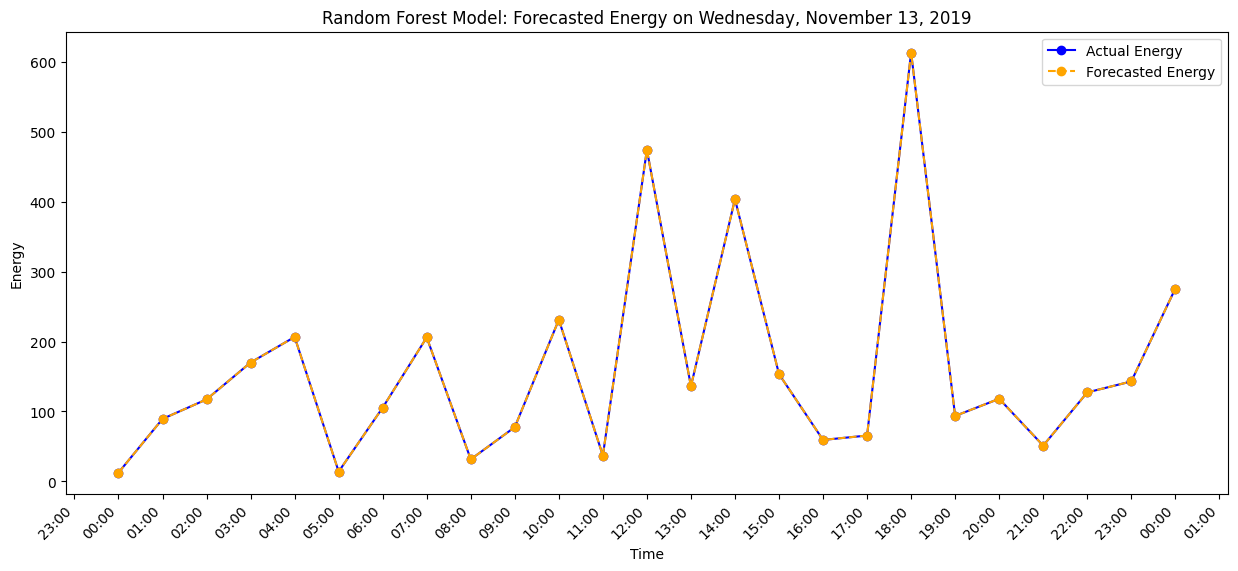

In [ ]:
import matplotlib.dates as mdates

# Plot forecasted energy for the selected points (one day) with the exact date and day
plt.figure(figsize=(15, 6))
plt.plot(time_range_selected_one_day, y_test_selected_one_day, label='Actual Energy', marker='o', color='blue')
plt.plot(time_range_selected_one_day, y_pred_selected_one_day, label='Forecasted Energy', marker='o', linestyle='--', color='orange')
plt.title(f'Random Forest Model: Forecasted Energy on {random_date.strftime("%A, %B %d, %Y")}')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Show every hour on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis labels as hours and minutes
plt.legend()
plt.show()


Mean Squared Error (MSE): 7.343557853711793


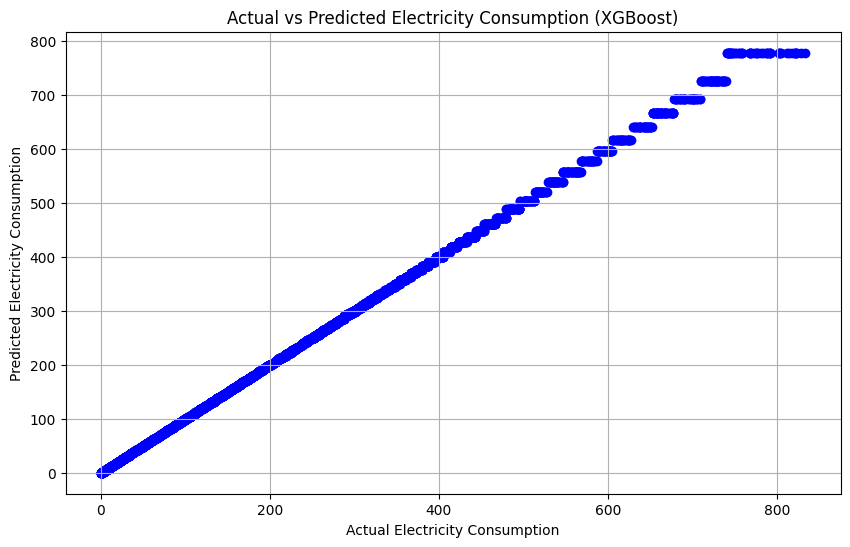

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score (R2):", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Electricity Consumption (XGBoost)')
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the testing data
y_pred = model.predict(X_test).flatten()




Epoch 1/50
877/877 [==============================] - 3s 3ms/step - loss: 17230.0527 - val_loss: 7741.2012
Epoch 2/50
877/877 [==============================] - 2s 2ms/step - loss: 6198.8423 - val_loss: 4052.5845
Epoch 3/50
877/877 [==============================] - 2s 2ms/step - loss: 1976.2969 - val_loss: 502.9828
Epoch 4/50
877/877 [==============================] - 2s 2ms/step - loss: 190.5832 - val_loss: 65.4576
Epoch 5/50
877/877 [==============================] - 2s 2ms/step - loss: 64.4784 - val_loss: 42.4696
Epoch 6/50
877/877 [==============================] - 2s 3ms/step - loss: 57.9073 - val_loss: 39.0985
Epoch 7/50
877/877 [==============================] - 3s 3ms/step - loss: 55.8803 - val_loss: 36.5071
Epoch 8/50
877/877 [==============================] - 2s 2ms/step - loss: 52.4292 - val_loss: 39.9625
Epoch 9/50
877/877 [==============================] - 2s 2ms/step - loss: 49.8305 - val_loss: 31.4032
Epoch 10/50
877/877 [==============================] - 2s 2ms/step - 

Mean Squared Error (MSE): 8.135845049281894


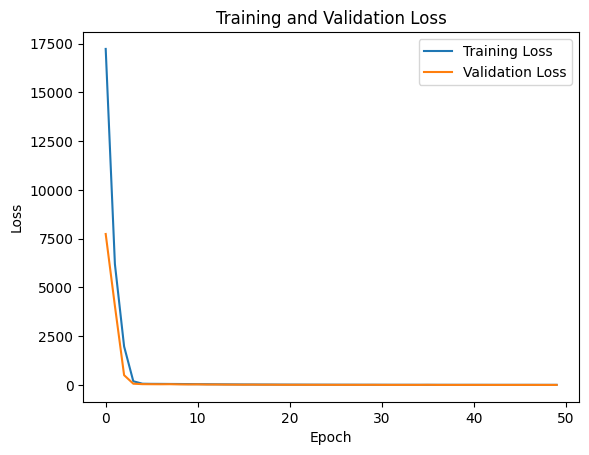

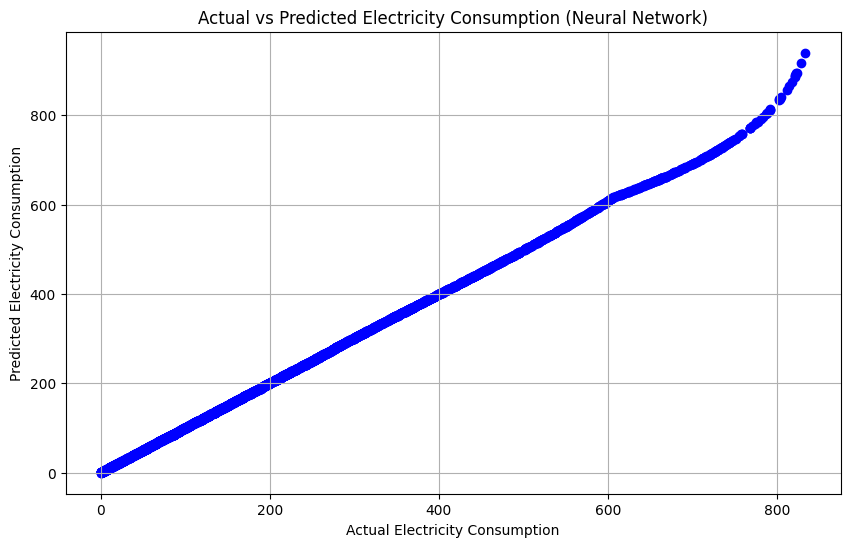

In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score (R2):", r2)
# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Electricity Consumption (Neural Network)')
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.grid(True)
plt.show()


274/274 [==============================] - 1s 2ms/step
Mean Squared Error (MSE): 0.13941634824374116


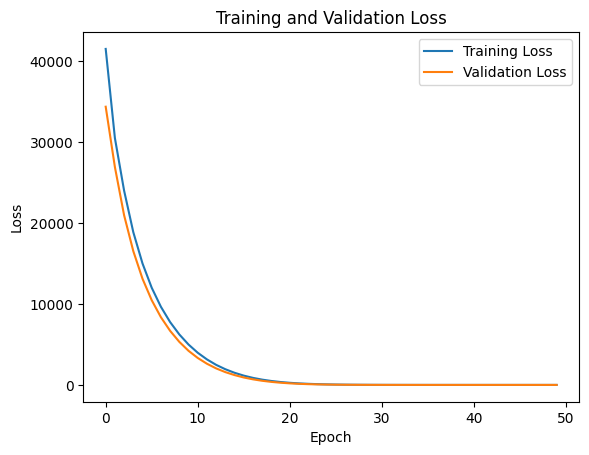

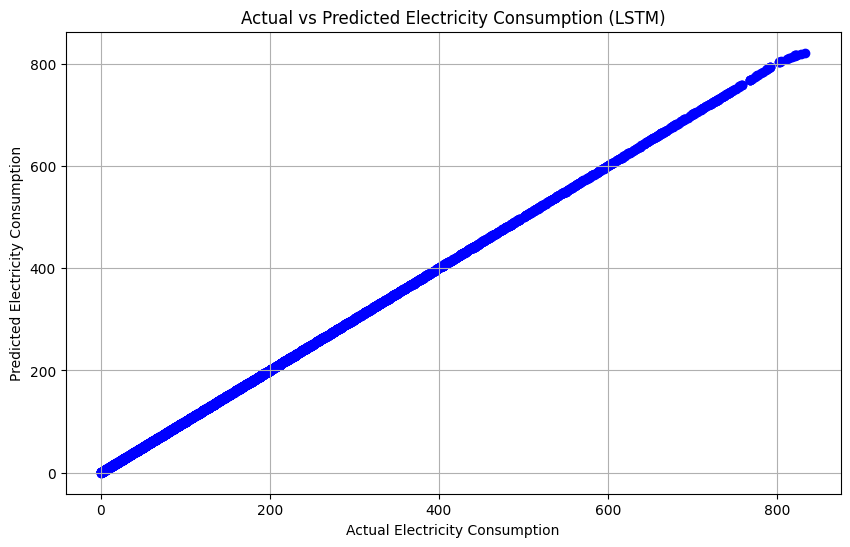

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the number of timesteps
n_steps = 10

# Reshape the input data for LSTM with custom timestep
def reshape_data_for_lstm(X, y, n_steps):
    X_lstm, y_lstm = [], []
    for i in range(len(X) - n_steps + 1):
        X_lstm.append(X[i:i+n_steps])
        y_lstm.append(y[i+n_steps-1])
    return np.array(X_lstm), np.array(y_lstm)

X_train_lstm, y_train_lstm = reshape_data_for_lstm(X_train.values, y_train.values, n_steps)
X_test_lstm, y_test_lstm = reshape_data_for_lstm(X_test.values, y_test.values, n_steps)

# Define the LSTM model architecture
model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.2)),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the testing data
y_pred = model.predict(X_test_lstm).flatten()

# Evaluate the model
mse = mean_squared_error(y_test_lstm, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score
r2 = r2_score(y_test_lstm, y_pred)
print("R-squared Score (R2):", r2)

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_lstm, y_pred, color='blue')
plt.title('Actual vs Predicted Electricity Consumption (LSTM)')
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.grid(True)
plt.show()


In [ ]:
# Define the number of timesteps
n_steps = 10

# Reshape the input data for LSTM with custom timestep
def reshape_data_for_lstm(X, y, n_steps):
    X_lstm, y_lstm = [], []
    for i in range(len(X) - n_steps + 1):
        X_lstm.append(X[i:i+n_steps])
        y_lstm.append(y[i+n_steps-1])
    return np.array(X_lstm), np.array(y_lstm)

X_train_lstm, y_train_lstm = reshape_data_for_lstm(X_train.values, y_train.values, n_steps)
X_test_lstm, y_test_lstm = reshape_data_for_lstm(X_test.values, y_test.values, n_steps)

# Define the LSTM model architecture with ReLU activation
model = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the testing data
y_pred = model.predict(X_test_lstm).flatten()


Epoch 1/50
877/877 [==============================] - 63s 8ms/step - loss: 15000.9590 - val_loss: 2385.1631
Epoch 2/50
877/877 [==============================] - 8s 9ms/step - loss: 230.7009 - val_loss: 236.7380
Epoch 3/50
877/877 [==============================] - 6s 7ms/step - loss: 89.3021 - val_loss: 27.7128
Epoch 4/50
877/877 [==============================] - 8s 9ms/step - loss: 61.1507 - val_loss: 32.3892
Epoch 5/50
877/877 [==============================] - 8s 9ms/step - loss: 45.8424 - val_loss: 7.9880
Epoch 6/50
877/877 [==============================] - 7s 9ms/step - loss: 43.6563 - val_loss: 24.6496
Epoch 7/50
877/877 [==============================] - 7s 8ms/step - loss: 31.3776 - val_loss: 6.8936
Epoch 8/50
877/877 [==============================] - 7s 8ms/step - loss: 41.2373 - val_loss: 51.3194
Epoch 9/50
877/877 [==============================] - 8s 9ms/step - loss: 24.3347 - val_loss: 131.5447
Epoch 10/50
877/877 [==============================] - 17s 19ms/step - loss

KeyboardInterrupt: 

Mean Squared Error (MSE): 1.1012218086534518
R-squared Score (R2): 0.9999509181705163


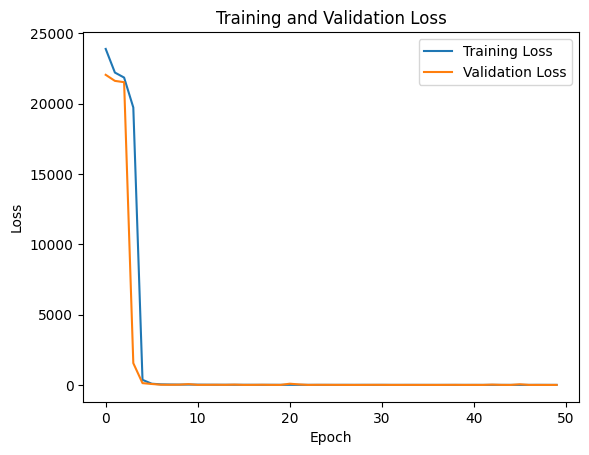

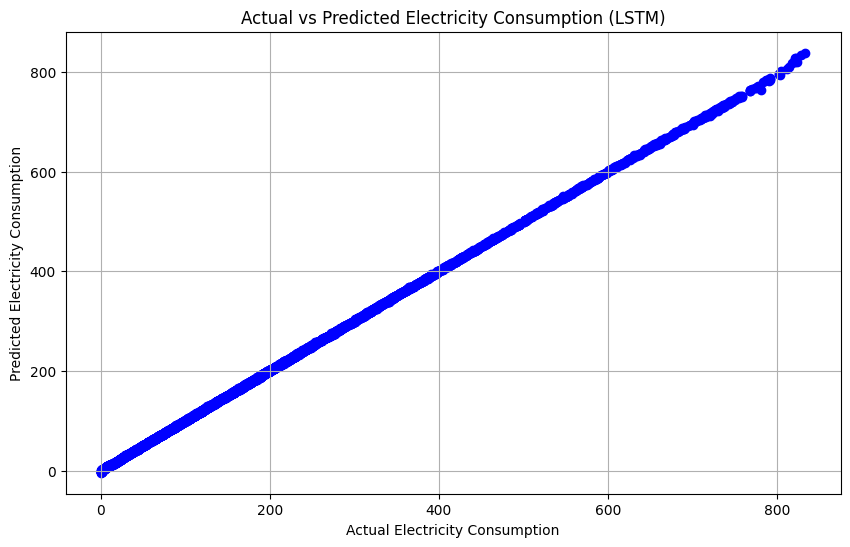

In [ ]:

# Evaluate the model
mse = mean_squared_error(y_test_lstm, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared score
r2 = r2_score(y_test_lstm, y_pred)
print("R-squared Score (R2):", r2)

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_lstm, y_pred, color='blue')
plt.title('Actual vs Predicted Electricity Consumption (LSTM)')
plt.xlabel('Actual Electricity Consumption')
plt.ylabel('Predicted Electricity Consumption')
plt.grid(True)
plt.show()


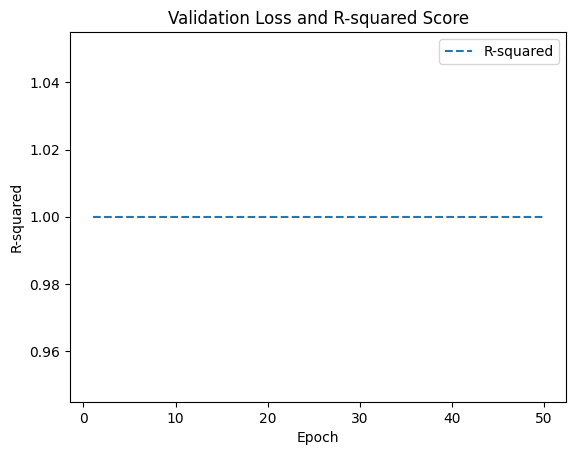